In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
DNA_SIZE = 24
POP_SIZE = 200
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.005
N_GENERATIONS = 50
X_BOUND = [-3, 3]
Y_BOUND = [-3, 3]

In [3]:
def F(x, y):
	return 3*(1-x)**2*np.exp(-(x**2)-(y+1)**2)- 10*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2)- 1/3**np.exp(-(x+1)**2 - y**2)

$$
3\,{\mathrm{e}}^{-{{\left(y+1\right)}}^2 -x^2 } \,{{\left(x-1\right)}}^2 +{\mathrm{e}}^{-x^2 -y^2 } \,{\left(10\,x^3 -2\,x+10\,y^5 \right)}-\frac{1}{3^{{\mathrm{e}}^{-{{\left(x+1\right)}}^2 -y^2 } } }
$$

In [4]:
def plot_3d(ax):

	X = np.linspace(*X_BOUND, 100)
	Y = np.linspace(*Y_BOUND, 100)
	X,Y = np.meshgrid(X, Y)
	Z = F(X, Y)
	ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=cm.coolwarm)
	ax.set_zlim(-10,10)
	ax.set_xlabel('x')
	ax.set_ylabel('y')
	ax.set_zlabel('z')
	plt.pause(3)
	plt.show()

In [5]:
def get_fitness(pop):
    x,y = translateDNA(pop)
    pred = F(x, y)
    return (pred - np.min(pred)) + 1e-3 #减去最小的适应度是为了防止适应度出现负数，通过这一步fitness的范围为[0, np.max(pred)-np.min(pred)],最后在加上一个很小的数防止出现为0的适应度

In [6]:
def translateDNA(pop): #pop表示种群矩阵，一行表示一个二进制编码表示的DNA，矩阵的行数为种群数目
	x_pop = pop[:,1::2]#奇数列表示X
	y_pop = pop[:,::2] #偶数列表示y
    
	#pop:(POP_SIZE,DNA_SIZE)*(DNA_SIZE,1) --> (POP_SIZE,1)
	x = x_pop.dot(2**np.arange(DNA_SIZE)[::-1])/float(2**DNA_SIZE-1)*(X_BOUND[1]-X_BOUND[0])+X_BOUND[0]
	y = y_pop.dot(2**np.arange(DNA_SIZE)[::-1])/float(2**DNA_SIZE-1)*(Y_BOUND[1]-Y_BOUND[0])+Y_BOUND[0]
	return x,y

In [7]:
def crossover_and_mutation(pop, CROSSOVER_RATE = 0.8):
	new_pop = []
	for father in pop:		#遍历种群中的每一个个体，将该个体作为父亲
		child = father		#孩子先得到父亲的全部基因（这里我把一串二进制串的那些0，1称为基因）
		if np.random.rand() < CROSSOVER_RATE:			#产生子代时不是必然发生交叉，而是以一定的概率发生交叉
			mother = pop[np.random.randint(POP_SIZE)]	#再种群中选择另一个个体，并将该个体作为母亲
			cross_points = np.random.randint(low=0, high=DNA_SIZE*2)	#随机产生交叉的点
			child[cross_points:] = mother[cross_points:]		#孩子得到位于交叉点后的母亲的基因
		mutation(child)	#每个后代有一定的机率发生变异
		new_pop.append(child)

	return new_pop

In [8]:
def mutation(child, MUTATION_RATE=0.003):
	if np.random.rand() < MUTATION_RATE: 				#以MUTATION_RATE的概率进行变异
		mutate_point = np.random.randint(0, DNA_SIZE)	#随机产生一个实数，代表要变异基因的位置
		child[mutate_point] = child[mutate_point]^1 	#将变异点的二进制为反转

In [9]:
def select(pop, fitness):    # nature selection wrt pop's fitness
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,
                           p=(fitness)/(fitness.sum()) )
    return pop[idx]

In [10]:
def print_info(pop):
	fitness = get_fitness(pop)
	max_fitness_index = np.argmax(fitness)
	print("max_fitness:", fitness[max_fitness_index])
	x,y = translateDNA(pop)
	print("最优的基因型：", pop[max_fitness_index])
	print("(x, y):", (x[max_fitness_index], y[max_fitness_index]))

C:\Users\35668\AppData\Local\Temp\ipykernel_20208\1807484156.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


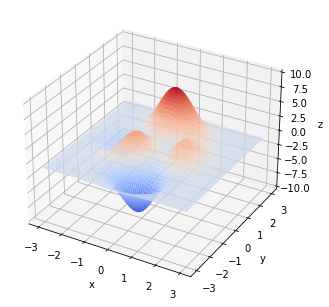

max_fitness: 6.766439000008856
最优的基因型： [1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 0 0 0 1 0 0 0 0 1]
(x, y): (-0.01246208026779172, 1.561490807622123)


In [11]:
if __name__ == "__main__":
	fig = plt.figure()
	ax = Axes3D(fig)	
	plt.ion()#将画图模式改为交互模式，程序遇到plt.show不会暂停，而是继续执行
	plot_3d(ax)

	pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE*2)) #matrix (POP_SIZE, DNA_SIZE)
	for _ in range(N_GENERATIONS):#迭代N代
		x,y = translateDNA(pop)
		if 'sca' in locals(): 
			sca.remove()
		sca = ax.scatter(x, y, F(x,y), c='black', marker='o');plt.show();plt.pause(0.1)
		pop = np.array(crossover_and_mutation(pop, CROSSOVER_RATE))
		#F_values = F(translateDNA(pop)[0], translateDNA(pop)[1])#x, y --> Z matrix
		fitness = get_fitness(pop)
		pop = select(pop, fitness) #选择生成新的种群
	
	print_info(pop)
	plt.ioff()
	plot_3d(ax)
